# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ornskoldsvik
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | erenhot
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | beyneu
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | lumeje
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | aswan
Processing Record 11 of Set 1 | taltal
Processing Record 12 of Set 1 | sehithwa
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | komsomolskiy
Processing Record 15 of Set 1 | sao mateus do maranhao
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | tavda
Processing Record 19 of Set 1 | ulladulla
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | butaritari
Proc

Processing Record 39 of Set 4 | sioux lookout
Processing Record 40 of Set 4 | miri
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | minsk
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | kamenka
Processing Record 47 of Set 4 | maningrida
Processing Record 48 of Set 4 | mitsamiouli
Processing Record 49 of Set 4 | paamiut
Processing Record 0 of Set 5 | souillac
Processing Record 1 of Set 5 | saint-pierre
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | sayat
Processing Record 4 of Set 5 | mtambile
Processing Record 5 of Set 5 | lavras
Processing Record 6 of Set 5 | yafran
Processing Record 7 of Set 5 | tuktoyaktuk
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | christchurch
Processing Record 10 of Set 5 | mar del plata
Processing Record 11 of Set 5 | kosh-agach
Processing Record 12

Processing Record 31 of Set 8 | ihosy
Processing Record 32 of Set 8 | clonakilty
Processing Record 33 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 8 | palmer
Processing Record 35 of Set 8 | moncao
Processing Record 36 of Set 8 | bengkulu
Processing Record 37 of Set 8 | luvianos
Processing Record 38 of Set 8 | tighina
Processing Record 39 of Set 8 | muros
Processing Record 40 of Set 8 | pahalgam
Processing Record 41 of Set 8 | san cristobal
Processing Record 42 of Set 8 | mittagong
Processing Record 43 of Set 8 | iskateley
Processing Record 44 of Set 8 | toftir
City not found. Skipping...
Processing Record 45 of Set 8 | jeremoabo
Processing Record 46 of Set 8 | bathsheba
Processing Record 47 of Set 8 | bambous virieux
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of Set 8 | rehoboth
Processing Record 0 of Set 9 | dubti
Processing Record 1 of Set 9 | vallenar
Processing Record 2 of Set 9 | abha
Processing Record 3 of Set 9 | soligalich
Proce

Processing Record 17 of Set 12 | gobabis
Processing Record 18 of Set 12 | kiama
Processing Record 19 of Set 12 | hualmay
Processing Record 20 of Set 12 | yumen
Processing Record 21 of Set 12 | shibarghan
City not found. Skipping...
Processing Record 22 of Set 12 | zhangye
Processing Record 23 of Set 12 | hit
Processing Record 24 of Set 12 | linhares
Processing Record 25 of Set 12 | mount gambier
Processing Record 26 of Set 12 | gabu
Processing Record 27 of Set 12 | myrtle beach
Processing Record 28 of Set 12 | elias
Processing Record 29 of Set 12 | sinnamary
Processing Record 30 of Set 12 | tirau
Processing Record 31 of Set 12 | makakilo city
Processing Record 32 of Set 12 | evanton
Processing Record 33 of Set 12 | vostok
Processing Record 34 of Set 12 | mancio lima
Processing Record 35 of Set 12 | kununurra
Processing Record 36 of Set 12 | rudnogorsk
Processing Record 37 of Set 12 | la ronge
Processing Record 38 of Set 12 | lima
Processing Record 39 of Set 12 | ushibuka
Processing Rec

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,23.48,69,55,4.70,ZA,1675493240
1,ornskoldsvik,63.2909,18.7153,-17.47,92,100,2.06,SE,1675493240
2,erenhot,43.6475,111.9767,-0.89,22,0,6.46,CN,1675493242
3,upernavik,72.7868,-56.1549,-25.73,99,100,2.27,GL,1675493243
4,beyneu,45.3167,55.2000,2.39,74,96,5.44,KZ,1675493243


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,23.48,69,55,4.70,ZA,1675493240
1,ornskoldsvik,63.2909,18.7153,-17.47,92,100,2.06,SE,1675493240
2,erenhot,43.6475,111.9767,-0.89,22,0,6.46,CN,1675493242
3,upernavik,72.7868,-56.1549,-25.73,99,100,2.27,GL,1675493243
4,beyneu,45.3167,55.2000,2.39,74,96,5.44,KZ,1675493243


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

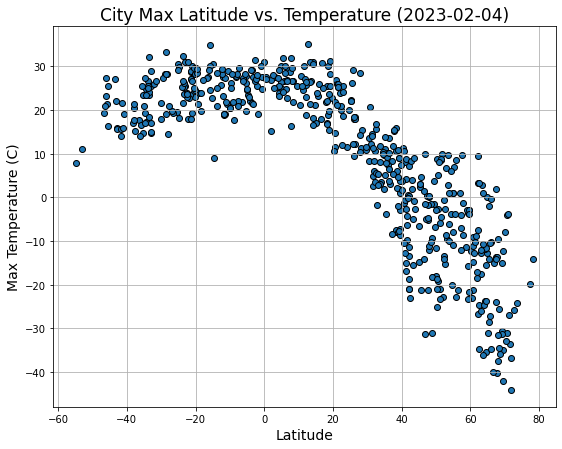

In [104]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Max Temperature (C)" , fontsize = 14)
plt.title("City Max Latitude vs. Temperature (2023-02-04)" , fontsize = 17)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

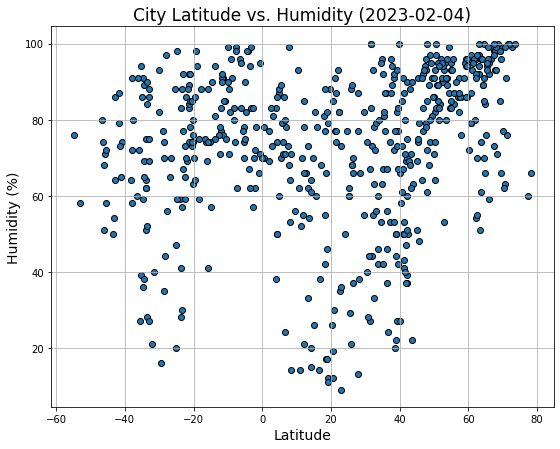

In [105]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-04)", fontsize = 17)
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

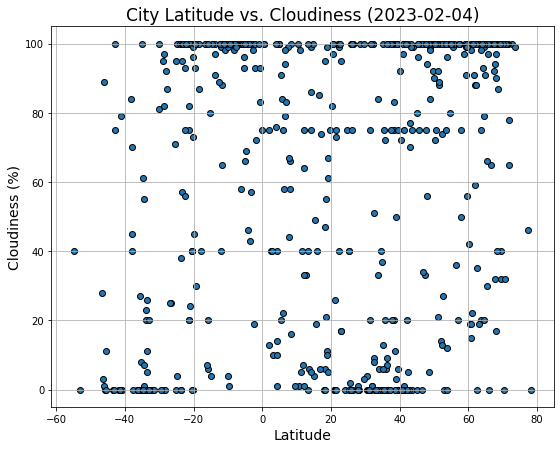

In [106]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.title("City Latitude vs. Cloudiness (2023-02-04)", fontsize = 17)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

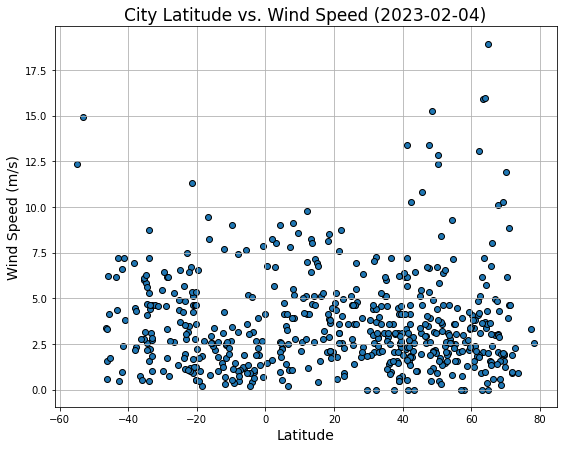

In [107]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (9,7))
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel("Wind Speed (m/s)", fontsize = 14)
plt.title("City Latitude vs. Wind Speed (2023-02-04)", fontsize = 17)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
def linear_regress(dataframe,column_1,column_2):
    
    # Assigning the values to columns 
    x = dataframe[column_1]
    y = dataframe[column_2]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    
    # Regression equation
    regress_val = x * slope + intercept
    slope_val = round(slope,2)
    inter_val = round(intercept,2)
    lequation = f"y = {slope_val}x + {inter_val}"
    
    # Plotting
    plt.figure(figsize = (9,7))
    plt.scatter(x, y,linewidth = 3)
    
    # Adding the linear regression line
    plt.plot(x, regress_val,"r-")
    
    # Adding the linear equation formula
    plt.annotate(lequation,(min(x),min(y) + 6),fontsize = 15, color = "red")
    
    # Labels
    plt.xlabel("Latitude", fontsize = 14)
    plt.ylabel(column_2, fontsize = 14)
    
    # Print the r-vlaue
    print(f"The r-value \033[1mis\033[0m: {rvalue}")
    
    plt.show()

In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ornskoldsvik,63.2909,18.7153,-17.47,92,100,2.06,SE,1675493240
2,erenhot,43.6475,111.9767,-0.89,22,0,6.46,CN,1675493242
3,upernavik,72.7868,-56.1549,-25.73,99,100,2.27,GL,1675493243
4,beyneu,45.3167,55.2000,2.39,74,96,5.44,KZ,1675493243
5,thompson,55.7435,-97.8558,-22.91,84,100,1.54,CA,1675493130


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,23.48,69,55,4.70,ZA,1675493240
6,lumeje,-11.5500,20.7833,19.08,91,100,1.70,AO,1675493244
9,taltal,-25.4000,-70.4833,19.48,88,71,1.34,CL,1675492822
10,sehithwa,-20.4667,22.7167,24.17,73,100,2.75,BW,1675493246
11,busselton,-33.6500,115.3333,32.24,28,5,4.41,AU,1675493247


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8602809401608296


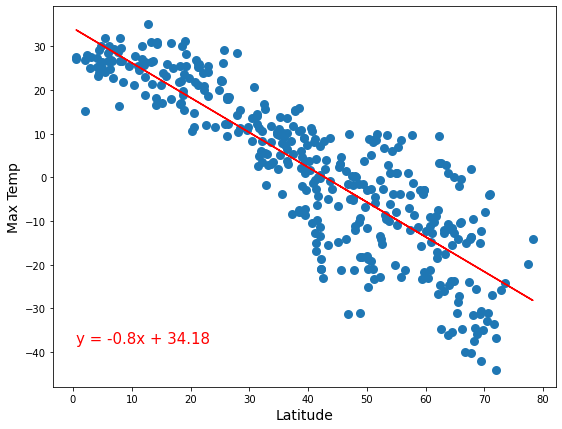

In [90]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.4038936149885591


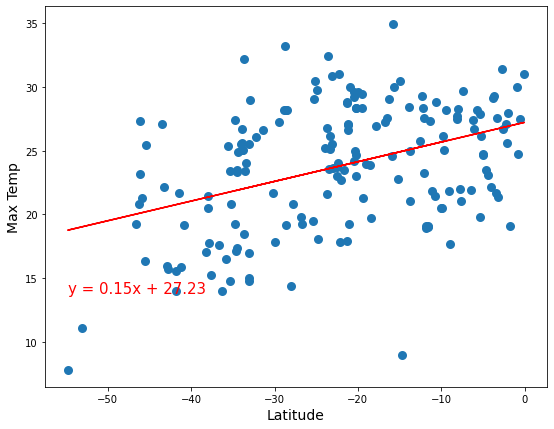

In [91]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** The downward trend in the scatterplot for the Northern Hemisphere with a r-value being a negative .86 shows a strong correlation between latitude and maximum temperatures. The regression line shows as the latitude increases the tempatures lowers. The upward trend for the Southern Hemisphere scatter plot shows a positive linear line. However, with the r-value only being .40, this shows a weak correlation, meaning there is not a direct correlation between latitude and maximum temperature. Therefore, it does not necessarily mean as the latitude decreases from the Southern Hemisphere that the tempature could be predicted accurately.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45175097416003307


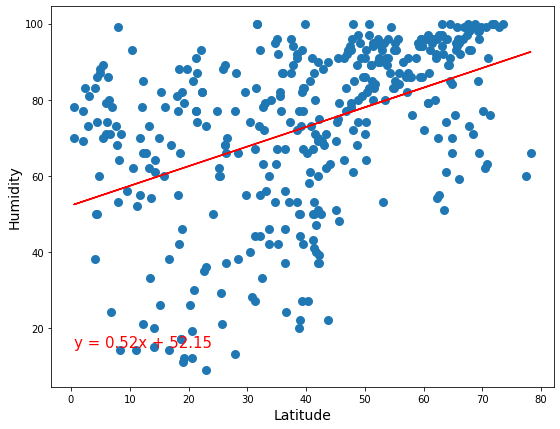

In [92]:
# Northern Hemisphere
linear_regress(northern_hemi_df,"Lat","Humidity")

The r-value is: 0.32248488997773345


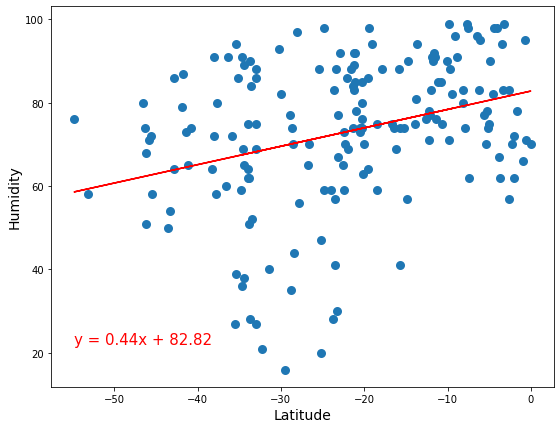

In [93]:
# Southern Hemisphere
linear_regress(southern_hemi_df,"Lat","Humidity")

**Discussion about the linear relationship:** Evaluating the linear line and and r-value there is a moderate correlation between latitude and humidity for the Northern Hemisphere. This shows there is some influence on humidity as the latitude increases. However, the r-value for the Southern Hemisphere shows a weak correlation and it can be determined the latitude has little to no affect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2650282417069505


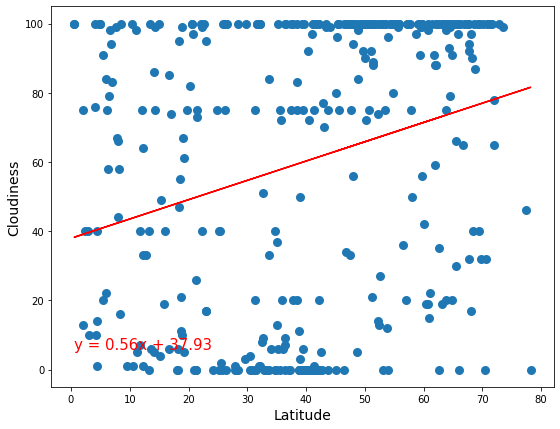

In [98]:
# Northern Hemisphere
linear_regress(northern_hemi_df,"Lat","Cloudiness")

The r-value is: 0.5712676879863003


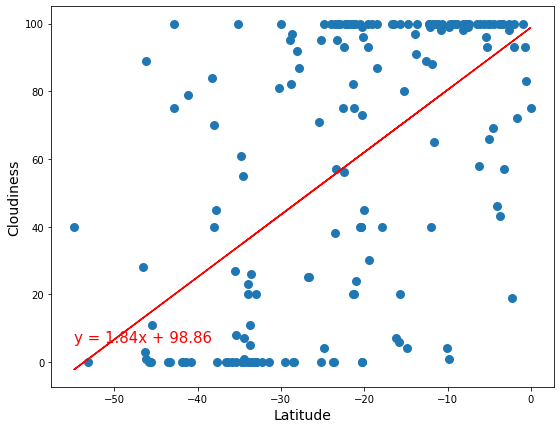

In [99]:
# Southern Hemisphere
linear_regress(southern_hemi_df,"Lat","Cloudiness")

**Discussion about the linear relationship:** Evaluating the linear line and the r-values show that there is a slightly strong correlation in the Southern Hemisphere in relationship to latitude and cloudiness. However, the r-value for the Northern Hemisphere shows a weak correlation between latitude and cloudiness therefore one cannot determine cloudiness based on latitude in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.0456285254086482


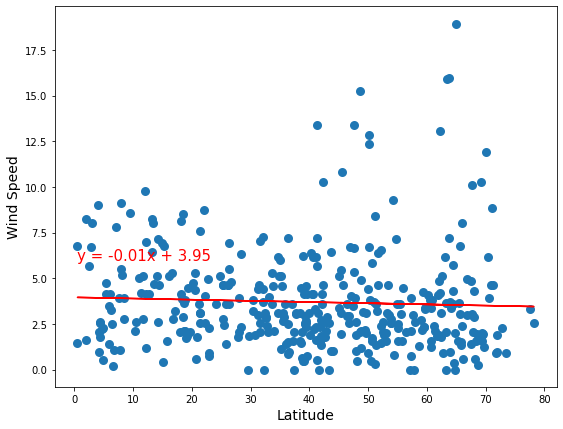

In [102]:
# Northern Hemisphere
linear_regress(northern_hemi_df,"Lat","Wind Speed")

The r-value is: -0.3080738421056492


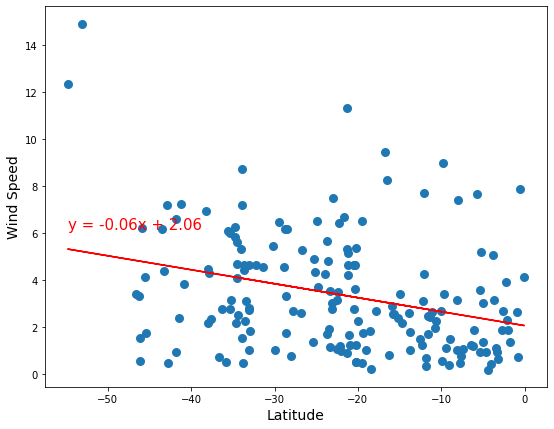

In [103]:
# Southern Hemisphere
linear_regress(southern_hemi_df,"Lat","Wind Speed")

**Discussion about the linear relationship:** In this data comparison both the Northern and Southern Hemisphere show a weak correlation between latitude and wind speed and neither are contigent on the other.